In [1]:
import os
import sys
import glob
import datetime
import calendar

import numpy as np
import xarray as xr
import scipy
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
DIR_SAT = '/glade/scratch/lgchen/data/OISSH_NOAA/2000-2022_fromEric'
fn_sat = 'j2_20150503.nc'  # corresponds to the old j2_2015123.nc, which has 47718 data, here 47708, thus 10 more.
ds_sat = xr.open_dataset(filename_or_obj = DIR_SAT + '/2015/' + fn_sat, mask_and_scale = True, decode_times = True)
print(ds_sat)
#print(ds_sat.lat)

<xarray.Dataset>
Dimensions:   (time: 47708)
Coordinates:
    lon       (time) float64 ...
    lat       (time) float64 ...
Dimensions without coordinates: time
Data variables:
    sla       (time) float32 ...
    time_mjd  (time) datetime64[ns] ...
    cycle     (time) float64 ...
    pass      (time) float64 ...
    latency   float32 ...
Attributes: (12/14)
    Conventions:           CF-1.7
    title:                 RADS 4 pass file
    institution:           EUMETSAT / NOAA / TU Delft
    source:                radar altimeter
    references:            RADS Data Manual, Version 4.2 or later
    featureType:           trajectory
    ...                    ...
    ellipsoid_flattening:  0.0033528131778969143
    filename:              j2_20150503.nc
    mission_name:          JASON-2
    mission_phase:         a
    log01:                 2023-05-06 | rads2nc -Sj2 -Vsla,time_mjd,lon,lat,c...
    history:               2023-05-06 03:04:13 : rads2nc -Sj2 -Vsla,time_mjd,...


Text(0.5, 1.0, 'time_mjd vs. record for j2_20150503.nc')

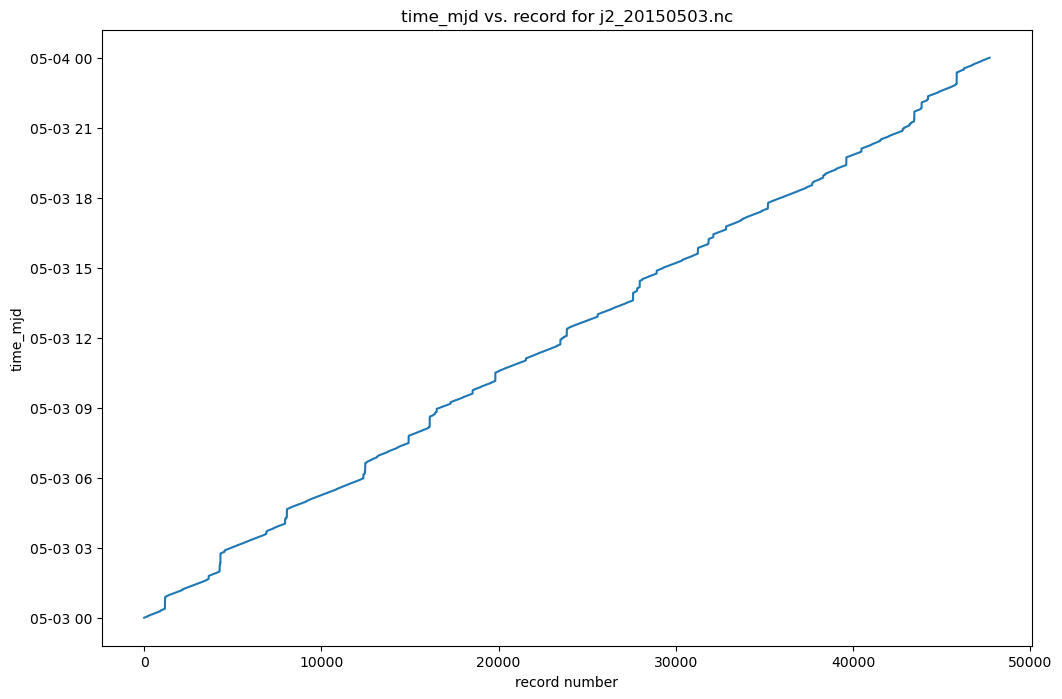

In [3]:
fig, ax = plt.subplots(figsize=(12, 8))
x = range(ds_sat.dims['time'])

ax.clear()

# check lat
ax.plot(x, ds_sat.time_mjd)
# ax.axhline(c='k')
ax.set_xlabel('record number')
ax.set_ylabel('time_mjd')
ax.set_title('time_mjd vs. record for j2_20150503.nc')
# fig

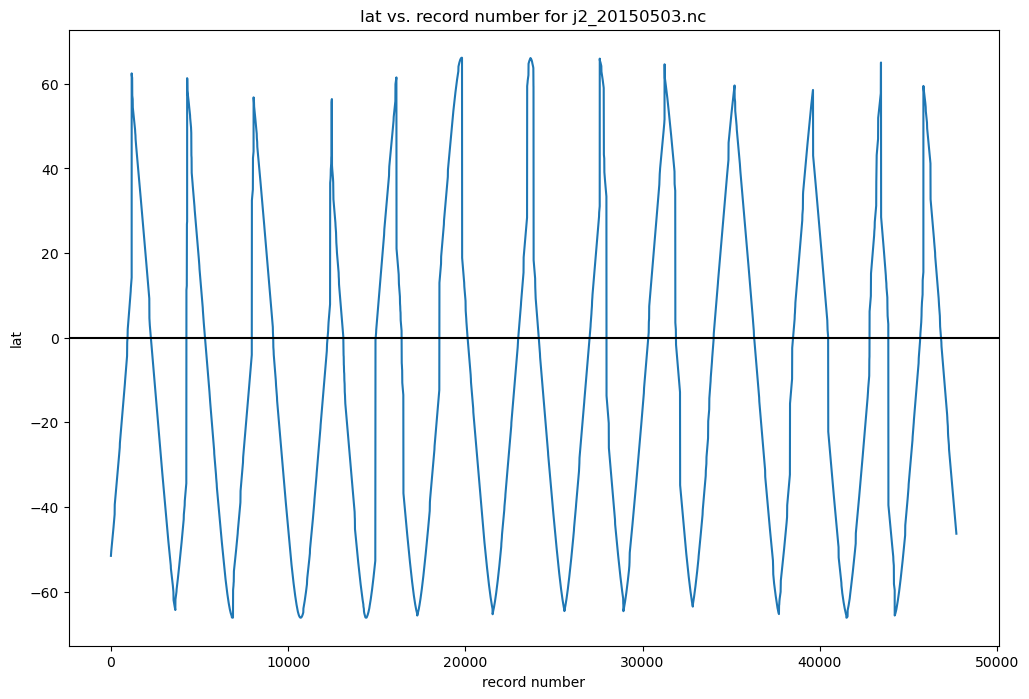

In [9]:
ax.clear()

# check pass
ax.plot(x, ds_sat.lat)
ax.axhline(c='k')
ax.set_xlabel('record number')
ax.set_ylabel('lat')
ax.set_title('lat vs. record number for j2_20150503.nc')
fig

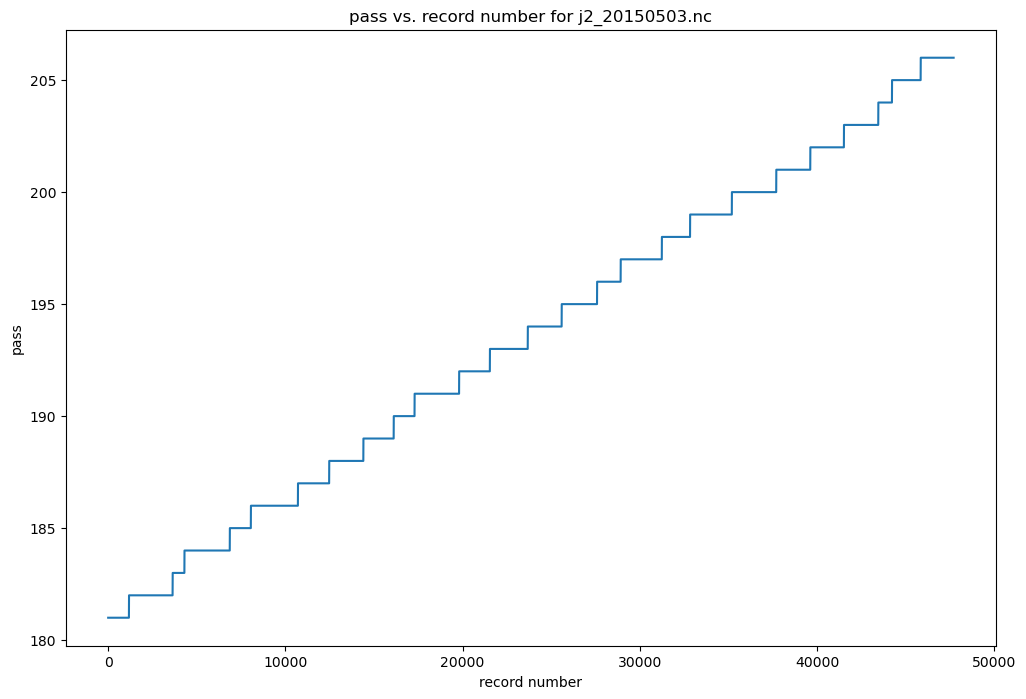

In [11]:
ax.clear()

# check pass
ax.plot(x, ds_sat['pass'])  # both pass and lat are 26 passes, seems matching. 
# ax.axhline(c='k')
ax.set_xlabel('record number')
ax.set_ylabel('pass')
ax.set_title('pass vs. record number for j2_20150503.nc')
fig

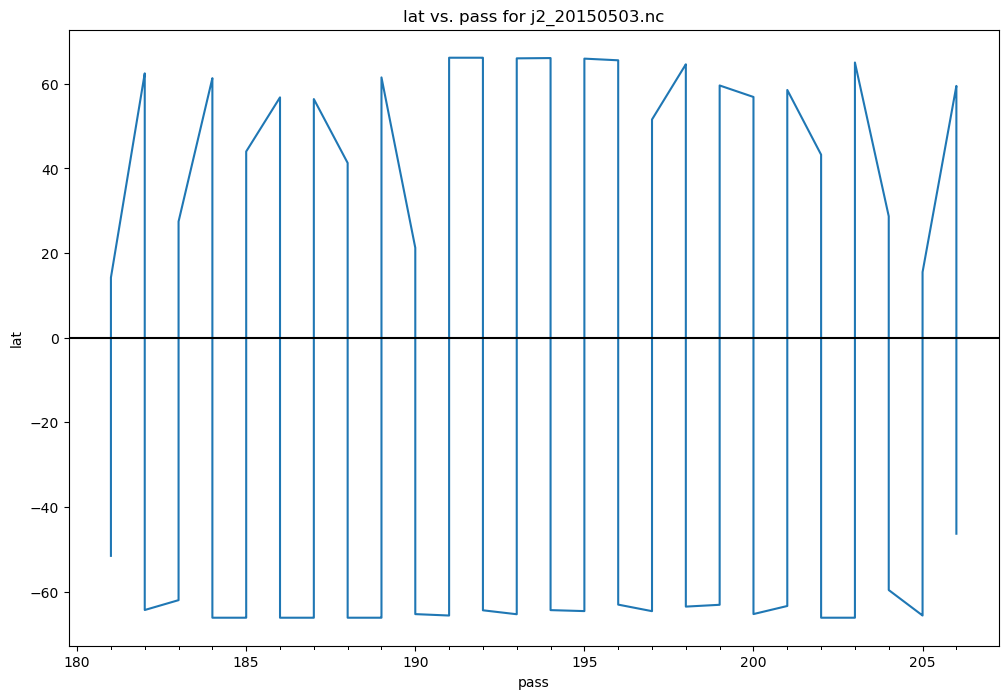

In [18]:
ax.clear()

#sla = ds_sat['sla']
#x = ds_sat['pass']

# check pass
ax.plot(x, ds_sat.lat)
##ax.set(xticks=x)
##ax.set_xticklabels(x)
#ax.set_xticks(x, minor=True)  # take too long
ax.axhline(c='k')
ax.set_xlabel('pass')
ax.set_ylabel('lat')
ax.set_title('lat vs. pass for j2_20150503.nc')
fig

In [4]:
# x = range(ds_sat.dims['time'])

unique_pass = np.unique(ds_sat['pass'].values)
print(len(unique_pass))
print(unique_pass)
arr_1stIdxOfEachPass = np.searchsorted(ds_sat['pass'].values, unique_pass, side='left')
arr_1stIdxOfEachPass = np.append(arr_1stIdxOfEachPass, len(ds_sat['pass']))  # need the last index
print(len(arr_1stIdxOfEachPass))
print(arr_1stIdxOfEachPass)


26
[181. 182. 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194.
 195. 196. 197. 198. 199. 200. 201. 202. 203. 204. 205. 206.]
27
[    0  1171  3635  4301  6861  8050 10706 12469 14398 16110 17287 19801
 21537 23675 25588 27585 28917 31240 32834 35191 37696 39617 41515 43454
 44227 45846 47708]


In [12]:
for i in range(len(arr_1stIdxOfEachPass)-1):
    print('i=', str(i).zfill(2), ', lat: ', ds_sat.lat[arr_1stIdxOfEachPass[i]].values, ', ', ds_sat.lat[arr_1stIdxOfEachPass[i+1]-1].values)

i= 00 , lat:  -51.531909999999996 ,  14.211796999999999
i= 01 , lat:  62.448978 ,  -64.326608
i= 02 , lat:  -61.998445999999994 ,  27.450338
i= 03 , lat:  61.313213999999995 ,  -66.147683
i= 04 , lat:  -66.147854 ,  43.992874
i= 05 , lat:  56.781893999999994 ,  -66.14865
i= 06 , lat:  -66.14885199999999 ,  56.378659
i= 07 , lat:  41.287425999999996 ,  -66.14843499999999
i= 08 , lat:  -66.14849199999999 ,  61.493477999999996
i= 09 , lat:  21.343042999999998 ,  -65.297421
i= 10 , lat:  -65.630212 ,  66.14640899999999
i= 11 , lat:  66.146552 ,  -64.394386
i= 12 , lat:  -65.326283 ,  65.998835
i= 13 , lat:  66.065966 ,  -64.353996
i= 14 , lat:  -64.582994 ,  65.931438
i= 15 , lat:  65.560619 ,  -63.051762
i= 16 , lat:  -64.601794 ,  51.556515
i= 17 , lat:  64.592512 ,  -63.523461999999995
i= 18 , lat:  -63.118151 ,  59.591058
i= 19 , lat:  56.872875 ,  -65.28478299999999
i= 20 , lat:  -63.399459 ,  58.532309
i= 21 , lat:  43.286589 ,  -66.14722499999999
i= 22 , lat:  -66.147828 ,  65.01325

In [16]:
for i in range(len(arr_1stIdxOfEachPass)-1):
    if i%2==0: 
        if np.all(np.diff(ds_sat.lat.values[arr_1stIdxOfEachPass[i]:arr_1stIdxOfEachPass[i+1]]) >= 0):
            print('i=', str(i).zfill(2), ', correctly ascending!')
        else:
            print('i=', str(i).zfill(2), ', NOT correctly ascending!')
    else: 
        if np.all(np.diff(ds_sat.lat.values[arr_1stIdxOfEachPass[i]:arr_1stIdxOfEachPass[i+1]]) <= 0):
            print('i=', str(i).zfill(2), ', correctly descending!')
        else:
            print('i=', str(i).zfill(2), ', NOT correctly descending!')


i= 00 , correctly ascending!
i= 01 , correctly descending!
i= 02 , correctly ascending!
i= 03 , correctly descending!
i= 04 , correctly ascending!
i= 05 , correctly descending!
i= 06 , correctly ascending!
i= 07 , correctly descending!
i= 08 , correctly ascending!
i= 09 , correctly descending!
i= 10 , correctly ascending!
i= 11 , correctly descending!
i= 12 , correctly ascending!
i= 13 , correctly descending!
i= 14 , correctly ascending!
i= 15 , correctly descending!
i= 16 , correctly ascending!
i= 17 , correctly descending!
i= 18 , correctly ascending!
i= 19 , correctly descending!
i= 20 , correctly ascending!
i= 21 , correctly descending!
i= 22 , correctly ascending!
i= 23 , correctly descending!
i= 24 , correctly ascending!
i= 25 , correctly descending!


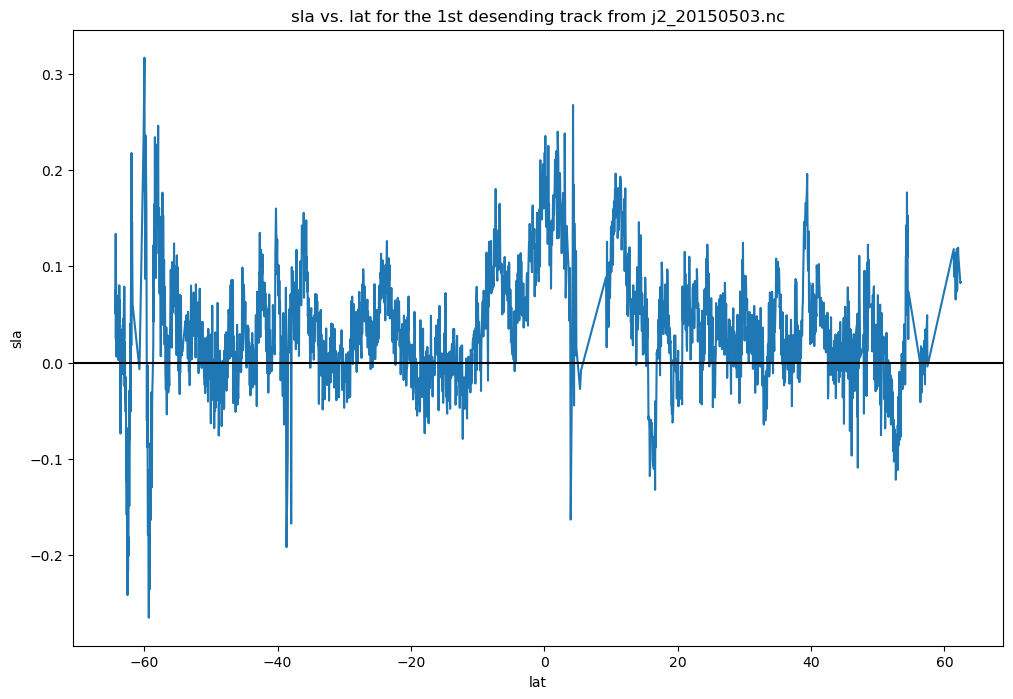

In [15]:
ax.clear()

y = ds_sat['sla'].values[arr_1stIdxOfEachPass[1]:arr_1stIdxOfEachPass[2]]
x = ds_sat.lat.values[arr_1stIdxOfEachPass[1]:arr_1stIdxOfEachPass[2]]

ax.plot(x, y)
ax.axhline(c='k')
ax.set_xlabel('lat')
ax.set_ylabel('sla')
ax.set_title('sla vs. lat for the 1st desending track from j2_20150503.nc')
fig

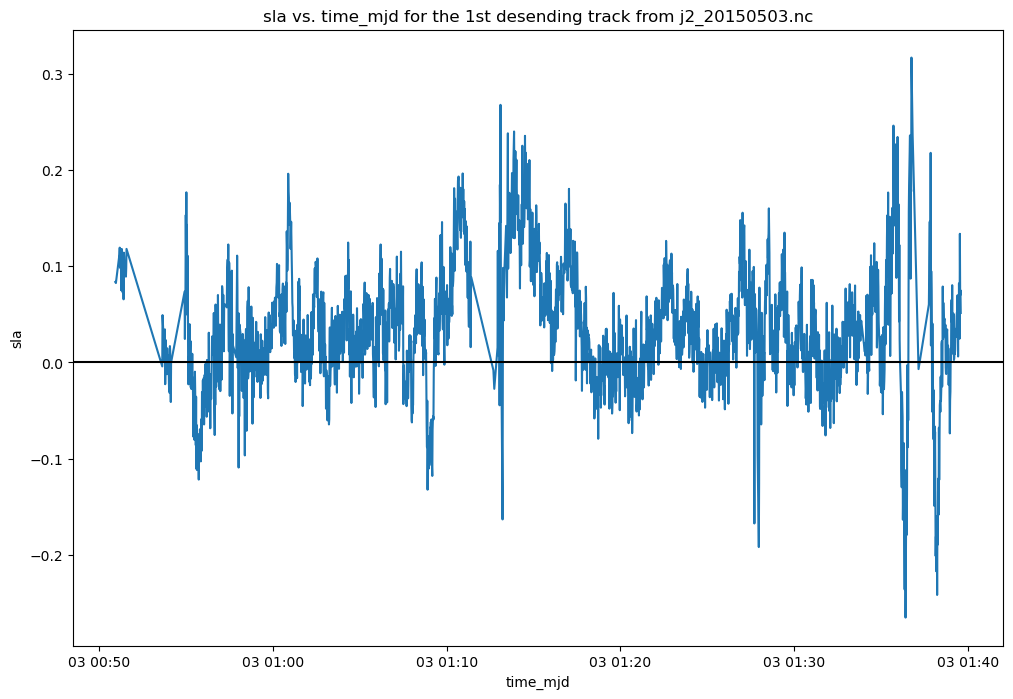

In [5]:
ax.clear()

y = ds_sat['sla'].values[arr_1stIdxOfEachPass[1]:arr_1stIdxOfEachPass[2]]
x = ds_sat['time_mjd'].values[arr_1stIdxOfEachPass[1]:arr_1stIdxOfEachPass[2]]

ax.plot(x, y)
ax.axhline(c='k')
ax.set_xlabel('time_mjd')
ax.set_ylabel('sla')
ax.set_title('sla vs. time_mjd for the 1st desending track from j2_20150503.nc')
fig

In [8]:
f         = ds_sat['sla'].values[arr_1stIdxOfEachPass[1]:arr_1stIdxOfEachPass[2]]  # pass_sla
pass_time = ds_sat['time_mjd'].values[arr_1stIdxOfEachPass[1]:arr_1stIdxOfEachPass[2]]
N         = len(f)
print('N = ', N)

fl = np.zeros(N, dtype=np.float32)
fs = np.zeros(N, dtype=np.float32)

a0 = np.mean(f)
print('a0 = ', a0)
a = np.zeros(6, dtype=np.float32)  # only use 1~5, 
b = np.zeros(6, dtype=np.float32)

# calculate time intervals as weights
total_t = pass_time[N-1] - pass_time[0]
print('total_t = ', total_t)

# delta_t = np.zeros(N)
#delta_t[0] = pass_time[1] - pass_time[0]
#delta_t[N-1] = pass_time[N-1] - pass_time[N-2]
#for i in range(1, N-1):
#    delta_t[i] = (pass_time[i+1] - pass_time[i-1]) / 2

delta_t = []
delta_t.append(pass_time[1] - pass_time[0])
for i in range(1, N-1):
    delta_t.append((pass_time[i+1] - pass_time[i-1]) / 2)
delta_t.append(pass_time[N-1] - pass_time[N-2])
# print('delta_t: ', delta_t)
tmp = 2*delta_t[0]/total_t
print('tmp=', tmp)

#print('type of total_t: ', type(total_t))
#print('type of delta_t[0]: ', type(delta_t))

# calculate coefficients of cos and sin
for i in range(1, 6): 
    for k in range(N): 
        r = 2 * np.pi * i * (pass_time[k] - pass_time[0])/total_t
        a[i] = a[i] + (2.0*delta_t[k]/total_t) * f[k] * np.cos(r)
        b[i] = b[i] + (2.0*delta_t[k]/total_t) * f[k] * np.sin(r)

a[5] = a[5]/2.
b[5] = b[5]/2.
print('a: ', a)
print('b: ', b)

# compute fl and then fs
for k in range(N):
    for i in range(1, 6):
        r = 2 * np.pi * i * (pass_time[k] - pass_time[0])/total_t
        fl[k] = fl[k] + a[i]*np.cos(r) + b[i]*np.sin(r)
    fl[k] = fl[k] + a0
    fs[k] = f[k] - fl[k]

print('fl: ', fl)
print('fs: ', fs)

N =  2464
a0 =  0.034886528
total_t =  2921393742848 nanoseconds
tmp= 0.0013968036270324532
a:  [ 0.         -0.01374915  0.01640012 -0.00638483  0.01867613 -0.00136215]
b:  [ 0.          0.00363371 -0.01257724  0.00409135 -0.01531164  0.00177017]
fl:  [0.04846665 0.04819366 0.04660597 ... 0.04873464 0.04860127 0.04846665]
fs:  [0.03513335 0.03420634 0.06319403 ... 0.02076536 0.02629873 0.00283335]


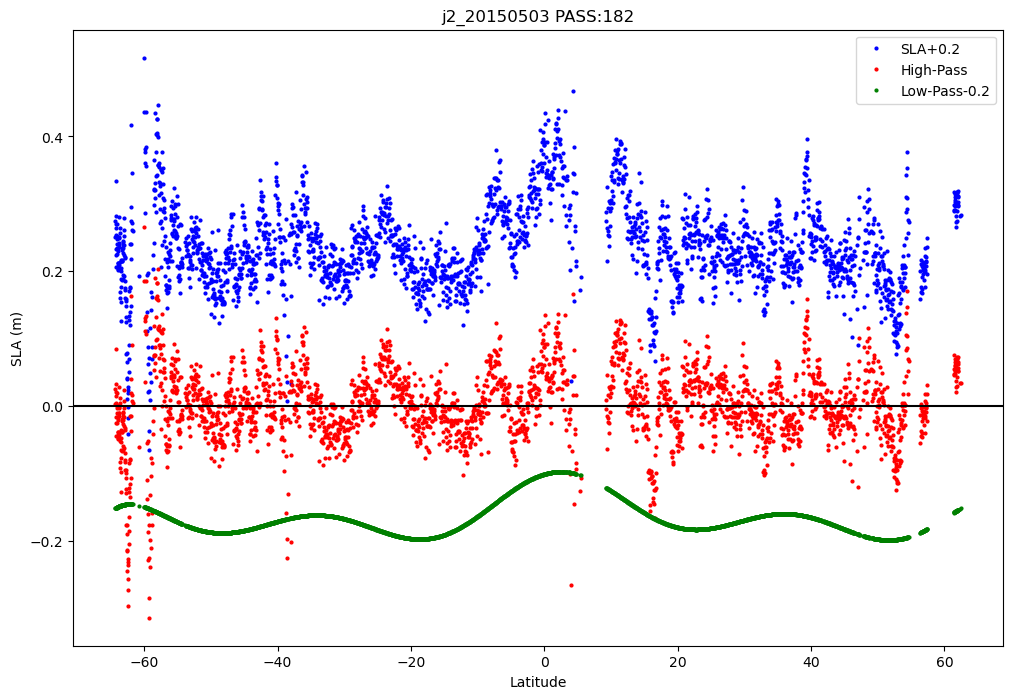

In [14]:
# plot
pass_lat = ds_sat.lat.values[arr_1stIdxOfEachPass[1]:arr_1stIdxOfEachPass[2]]

ax.clear()

ax.plot(pass_lat, f + 0.2 , 'bo', markersize=2, label='SLA+0.2')
ax.plot(pass_lat, fs      , 'ro', markersize=2, label='High-Pass')
ax.plot(pass_lat, fl - 0.2, 'go', markersize=2, label='Low-Pass-0.2')
ax.axhline(c='k')
ax.set_xlabel('Latitude')
ax.set_ylabel('SLA (m)')
ax.set_title('j2_20150503 PASS:182')
ax.legend()
fig
#fig.savefig('j2_20150503_pass182_FourierFilter_01.png')

In [15]:
# reorganize the above calculation of low/high pass SLA into a function for easy use.

def calc_low_pass_sla(pass_time, pass_sla):
    f = pass_sla
    N = len(f)
  # print('N = ', N)

    fl = np.zeros(N, dtype=np.float32)
  # fs = np.zeros(N, dtype=np.float32)

    a0 = np.mean(f)
  # print('a0 = ', a0)
    a = np.zeros(6, dtype=np.float32)  # only use 1~5, 
    b = np.zeros(6, dtype=np.float32)

    # calculate time intervals as weights
    total_t = pass_time[N-1] - pass_time[0]
  # print('total_t = ', total_t)
    delta_t = []
    delta_t.append(pass_time[1] - pass_time[0])
    for i in range(1, N-1):
        delta_t.append((pass_time[i+1] - pass_time[i-1]) / 2)
    delta_t.append(pass_time[N-1] - pass_time[N-2])

    # calculate coefficients of cos and sin
    for i in range(1, 6): 
        for k in range(N): 
            w = 2.0 * delta_t[k] / total_t
            r = 2 * np.pi * i * (pass_time[k] - pass_time[0])/total_t
            a[i] = a[i] + w * f[k] * np.cos(r)
            b[i] = b[i] + w * f[k] * np.sin(r)
    a[5] = a[5]/2.
    b[5] = b[5]/2.

    # compute fl, and you can get fh = f - fl outside of this function
    for k in range(N):
        for i in range(1, 6):
            r = 2 * np.pi * i * (pass_time[k] - pass_time[0])/total_t
            fl[k] = fl[k] + a[i]*np.cos(r) + b[i]*np.sin(r)
        fl[k] = fl[k] + a0
    
    return fl

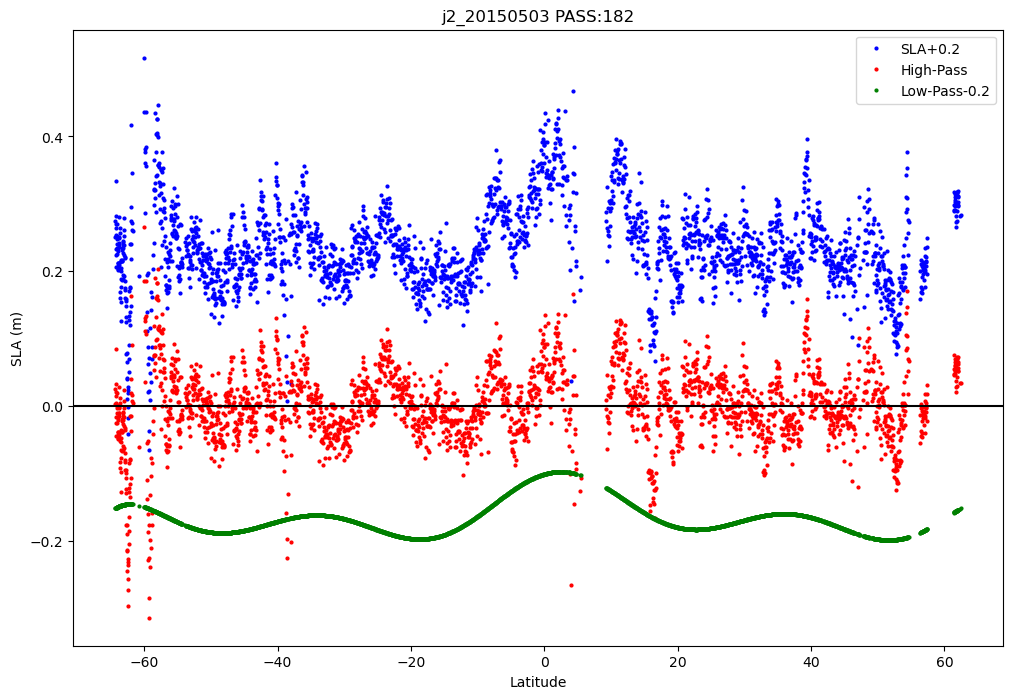

In [16]:
pass_time = ds_sat['time_mjd'].values[arr_1stIdxOfEachPass[1]:arr_1stIdxOfEachPass[2]]
pass_sla  = ds_sat['sla'].values[arr_1stIdxOfEachPass[1]:arr_1stIdxOfEachPass[2]] 

fl = calc_low_pass_sla(pass_time, pass_sla)
fh = pass_sla - fl

# plot
pass_lat = ds_sat.lat.values[arr_1stIdxOfEachPass[1]:arr_1stIdxOfEachPass[2]]

ax.clear()

ax.plot(pass_lat, pass_sla + 0.2 , 'bo', markersize=2, label='SLA+0.2')
ax.plot(pass_lat, fh      , 'ro', markersize=2, label='High-Pass')
ax.plot(pass_lat, fl - 0.2, 'go', markersize=2, label='Low-Pass-0.2')
ax.axhline(c='k')
ax.set_xlabel('Latitude')
ax.set_ylabel('SLA (m)')
ax.set_title('j2_20150503 PASS:182')
ax.legend()
fig

In [3]:
# test
# this code section from bard is wrong!
data = np.array([5, 8, 2, 1, 7, 3, 4, 5, 6, 2])
values = [2, 5]

indices = np.where(np.isin(data, values))[0]  # Find indices where values are present

# Print first index for each value:
for value, index in zip(values, indices):
    print(f"First index of {value}: {index}")

First index of 2: 0
First index of 5: 2


In [19]:
# test
t = np.array([3, 8, 8, 8, 1, 1, 1, 2, 2])  # 10 elements
#print(np.diff(t))  # 9 elements
#print(np.diff(t)[:-1])
#print(np.r_[1, np.diff(t)[:-1]])
print(np.nonzero(np.r_[1, np.diff(t)]))
print(np.nonzero(np.r_[1, np.diff(t)])[0][1])

#arr_1stIdx = np.nonzero(np.r_[1, np.diff(t)[:-1]])
#print(arr_1stIdx)

(array([0, 1, 4, 7]),)
1


<xarray.DataArray 'sla' (time: 38599)>
array([ 2.3283064e-10, -3.7252903e-09,  4.6566129e-10, ...,
        0.0000000e+00,  7.4505806e-09,  0.0000000e+00], dtype=float32)
Coordinates:
    lon      (time) float64 -100.6 -100.6 -100.5 -100.5 ... 126.4 126.5 126.6
    lat      (time) float64 17.03 16.98 16.93 16.88 ... -61.9 -61.87 -61.85
Dimensions without coordinates: time


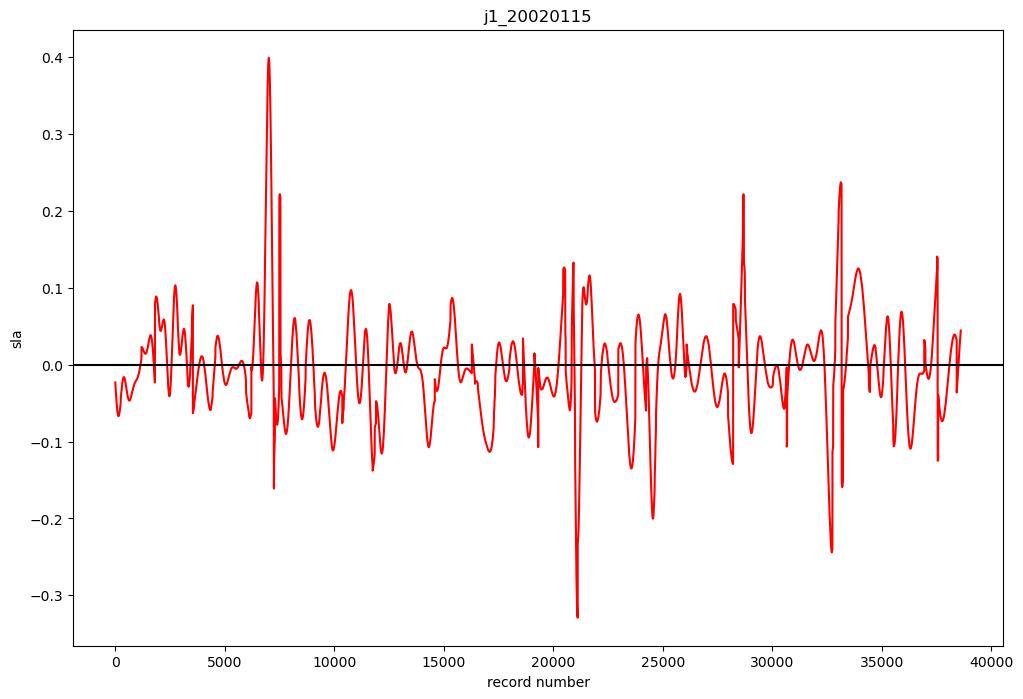

In [46]:
# check my Fourier filter result
DIR_SAT = '/glade/scratch/lgchen/data/OISSH_NOAA/2000-2022_fromEric'
fn = 'j1_20020115.nc'
fn_lp = 'j1_20020115_lp.nc'
fn_hp = 'j1_20020115_hp.nc'

ds    = xr.open_dataset(filename_or_obj = DIR_SAT + '/FourierFilter/test_02/' + fn   , mask_and_scale = True, decode_times = True)
ds_lp = xr.open_dataset(filename_or_obj = DIR_SAT + '/FourierFilter/test_02/' + fn_lp, mask_and_scale = True, decode_times = True)
ds_hp = xr.open_dataset(filename_or_obj = DIR_SAT + '/FourierFilter/test_02/' + fn_hp, mask_and_scale = True, decode_times = True)

da_diff = ds['sla'] - ds_lp['sla'] - ds_hp['sla']
print(da_diff)

#fig, ax = plt.subplots(figsize=(12, 8))
x = range(ds.dims['time'])
ax.clear()

# check lat
# ax.plot(x, ds.sla - ds_lp.sla - ds_hp.sla, 'b', label='original')
ax.plot(x, ds_lp.sla, 'r', label='lp')
#ax.plot(x, ds_hp.sla, 'b', label='hp')
ax.axhline(c='k')
ax.set_xlabel('record number')
ax.set_ylabel('sla')
ax.set_title('j1_20020115')
fig

<xarray.DataArray 'sla' (time: 53493)>
array([ 0.0000000e+00,  0.0000000e+00, -1.4901161e-08, ...,
        3.7252903e-09,  3.7252903e-09,  0.0000000e+00], dtype=float32)
Coordinates:
    lon      (time) float64 126.7 126.8 127.0 127.1 ... 15.85 15.87 15.9 15.93
    lat      (time) float64 -61.82 -61.79 -61.73 -61.7 ... -32.89 -32.93 -32.98
Dimensions without coordinates: time


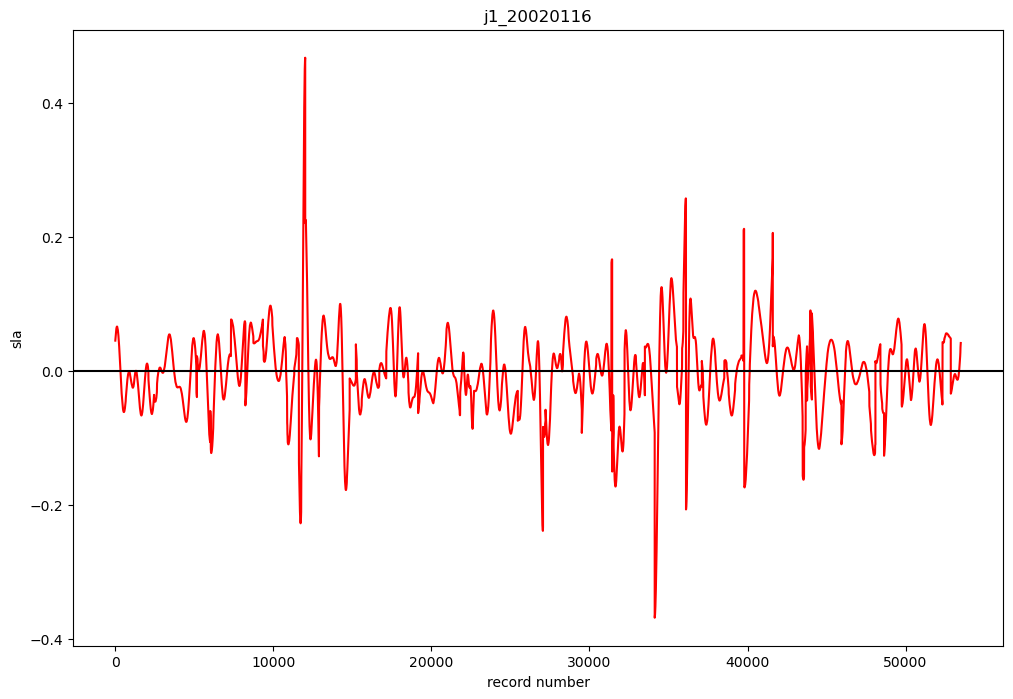

In [45]:
# check my Fourier filter result
# DIR_SAT = '/glade/scratch/lgchen/data/OISSH_NOAA/2000-2022_fromEric'
fn = 'j1_20020116.nc'
fn_lp = 'j1_20020116_lp.nc'
fn_hp = 'j1_20020116_hp.nc'

ds    = xr.open_dataset(filename_or_obj = DIR_SAT + '/FourierFilter/test_02/' + fn   , mask_and_scale = True, decode_times = True)
ds_lp = xr.open_dataset(filename_or_obj = DIR_SAT + '/FourierFilter/test_02/' + fn_lp, mask_and_scale = True, decode_times = True)
ds_hp = xr.open_dataset(filename_or_obj = DIR_SAT + '/FourierFilter/test_02/' + fn_hp, mask_and_scale = True, decode_times = True)

da_diff = ds['sla'] - ds_lp['sla'] - ds_hp['sla']
print(da_diff)

x = range(ds.dims['time'])

ax.clear()

# check lat
#ax.plot(x, ds.sla - ds_lp.sla - ds_hp.sla, 'b', label='original')
ax.plot(x, ds_lp.sla, 'r', label='lp')
#ax.plot(x, ds_hp.sla, 'b', label='hp')
ax.axhline(c='k')
ax.set_xlabel('record number')
ax.set_ylabel('sla')
ax.set_title('j1_20020116')
fig

<xarray.DataArray 'sla' (time: 52612)>
array([-3.7252903e-09, -7.4505806e-09, -3.7252903e-09, ...,
       -1.8626451e-09,  1.8626451e-09, -3.7252903e-09], dtype=float32)
Coordinates:
    lon      (time) float64 15.96 15.98 16.01 16.04 ... -18.47 -18.44 -18.42
    lat      (time) float64 -33.03 -33.08 -33.12 -33.17 ... 29.8 29.75 29.7
Dimensions without coordinates: time


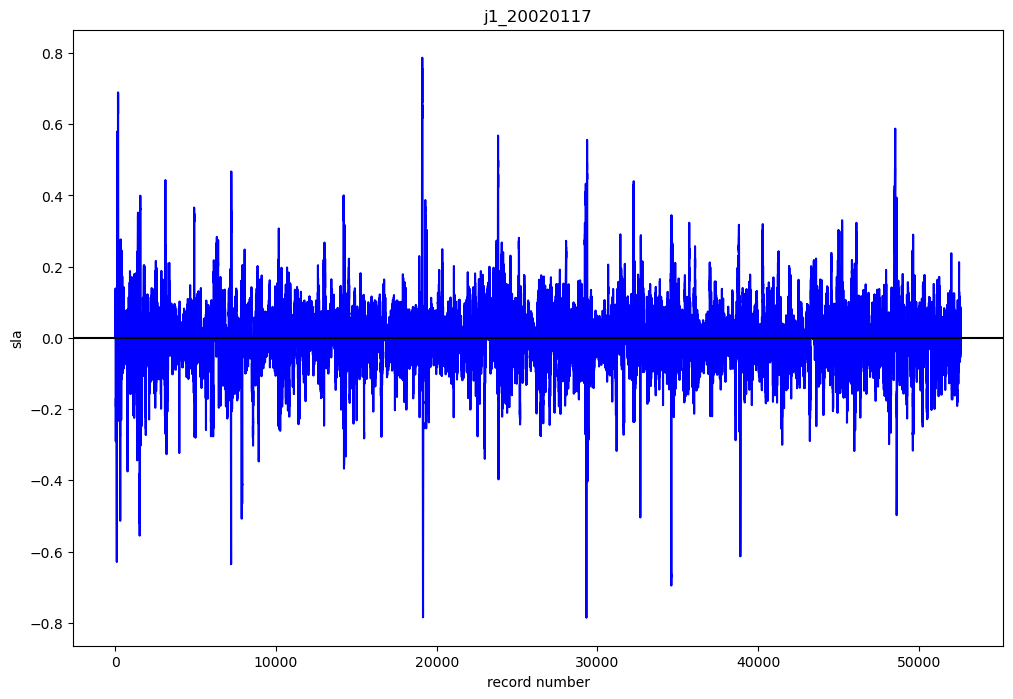

In [44]:
fn = 'j1_20020117.nc'
fn_lp = 'j1_20020117_lp.nc'
fn_hp = 'j1_20020117_hp.nc'

ds    = xr.open_dataset(filename_or_obj = DIR_SAT + '/FourierFilter/test_02/' + fn   , mask_and_scale = True, decode_times = True)
ds_lp = xr.open_dataset(filename_or_obj = DIR_SAT + '/FourierFilter/test_02/' + fn_lp, mask_and_scale = True, decode_times = True)
ds_hp = xr.open_dataset(filename_or_obj = DIR_SAT + '/FourierFilter/test_02/' + fn_hp, mask_and_scale = True, decode_times = True)

da_diff = ds['sla'] - ds_lp['sla'] - ds_hp['sla']
print(da_diff)

x = range(ds.dims['time'])
ax.clear()

# check lat
#ax.plot(x, ds.sla - ds_lp.sla - ds_hp.sla, 'b', label='original')
#ax.plot(x, ds_lp.sla, 'r', label='lp')
ax.plot(x, ds_hp.sla, 'b', label='hp')
ax.axhline(c='k')
ax.set_xlabel('record number')
ax.set_ylabel('sla')
ax.set_title('j1_20020117')
#ax.set_ylim(-0.000001, 0.000001)
fig